# 2.7 多次元への拡張 ($c>0$, $d>0$の場合)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # 3Dグラフ描画用
%matplotlib inline

In [2]:
c = 1.0
d = 1.0

dt = 0.05
dx = 0.1
dy = 0.1

jmax = 41
kmax = 41
nmax = 30

In [3]:
def init(dx, dy, jmax, kmax):
    x = np.linspace(0, dx * (jmax-1), jmax)
    y = np.linspace(0, dy * (kmax-1), kmax)
    q = init_q(x, y, jmax, kmax)
        
    return (x, y, q)

In [4]:
def init_q(x, y, jmax, kmax):
    def gausfunc(x, y, mu, V):
        detV = np.linalg.det(V)
        invV = np.linalg.inv(V)
        A = 1.0 / (2*np.pi*np.sqrt(detV))
        dX = (np.array([x, y]) - mu[:, None, None]).transpose(1, 2, 0)
        return A * np.exp(-0.5 * dX[:,:, None] @ invV[None, None] @ dX[:,:,:, None])

    mu = np.array([dx * jmax / 4, dy * kmax / 4])
    V = np.array([[dx * jmax / 40, 0], [0, dy * kmax / 40]])
    X, Y = np.meshgrid(x, y)
    
    q = gausfunc(X, Y, mu, V)[:, :, 0, 0]
    
    return q

メインループ（計算＋可視化(重ねて描画)）

In [5]:
def do_computing(x, y, q, dt, dx, dy, nmax, interval = 2):
    X, Y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(10, 7), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 10 # グラフの文字サイズ
    
    # 初期分布の可視化
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.plot_wireframe(X, Y, q, color = "black", rstride = 1, cstride = 1, linewidth=0.5)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    for n in range(1, nmax + 1):    
        qold = q.copy()
        for j in range(1, jmax - 1):
            for k in range(1, kmax - 1):
                # 式(2.57)
                q[j][k] = qold[j][k] - dt / dx * (
                    c * (qold[j][k] - qold[j-1][k]) + d * (qold[j][k] - qold[j][k-1])
                )

        # 各ステップの可視化
        if n % interval == 0:
            ax1.plot_wireframe(X,Y,q, color = "black", rstride = 1, cstride = 1, linewidth = 0.5)

    # グラフの後処理
    plt.show()

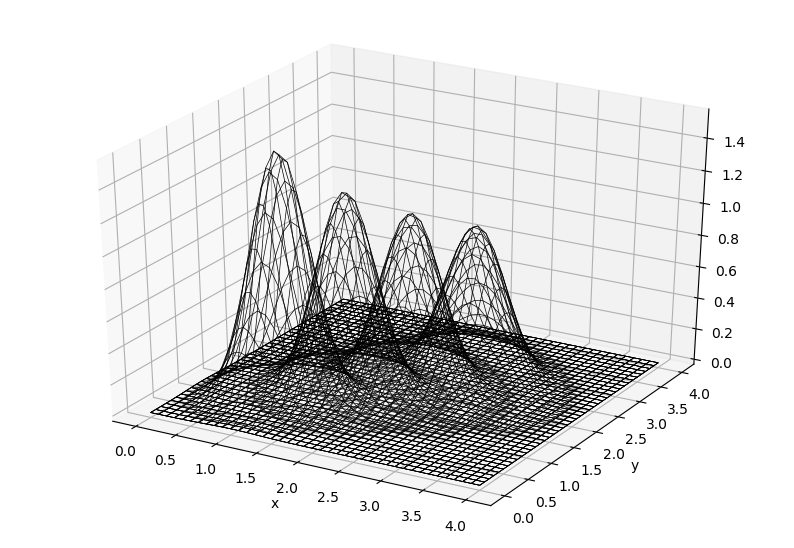

In [6]:
x, y, q = init(dx, dy, jmax, kmax)
do_computing(x, y, q, dt, dx, dy, nmax, interval = 10)

各タイムステップを個別に可視化

In [7]:
def do_computing(x, y, q, dt, dx, dy, nmax, interval = 2):
    X, Y = np.meshgrid(x, y)

    nfig = int(nmax / interval + 1)
    fig = plt.figure(figsize=(10, 7 * nfig), dpi=100) # グラフのサイズ
    plt.rcParams["font.size"] = 10 # グラフの文字サイズ

    qmax = np.max(q)
    
    # 初期分布の可視化
    ax1 = fig.add_subplot(nfig, 1, 1, projection='3d')
    surf = ax1.plot_surface(X,Y,q, antialiased=True, cmap="bwr", vmax = qmax)
    ax1.set_zlim(0, qmax)
    ax1.set_title('n = 0')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    fig.colorbar(surf)

    fidx = 2
    for n in range(1, nmax + 1):    
        qold = q.copy()
        for j in range(1, jmax - 1):
            for k in range(1, kmax - 1):
                # 式(2.57)
                q[j][k] = qold[j][k] - dt / dx * (
                    c * (qold[j][k] - qold[j-1][k]) + d * (qold[j][k] - qold[j][k-1])
                )

        # 各ステップの可視化
        if n % interval == 0:
            ax1 = fig.add_subplot(nfig, 1, fidx, projection='3d')
            surf = ax1.plot_surface(X, Y, q, antialiased=True, cmap="bwr", vmax = qmax)
            ax1.set_zlim(0, qmax)
            ax1.set_title(f'n = {n}')
            ax1.set_xlabel('x')
            ax1.set_ylabel('y')
            fig.colorbar(surf)
            fidx += 1

    # グラフの後処理
    plt.show()

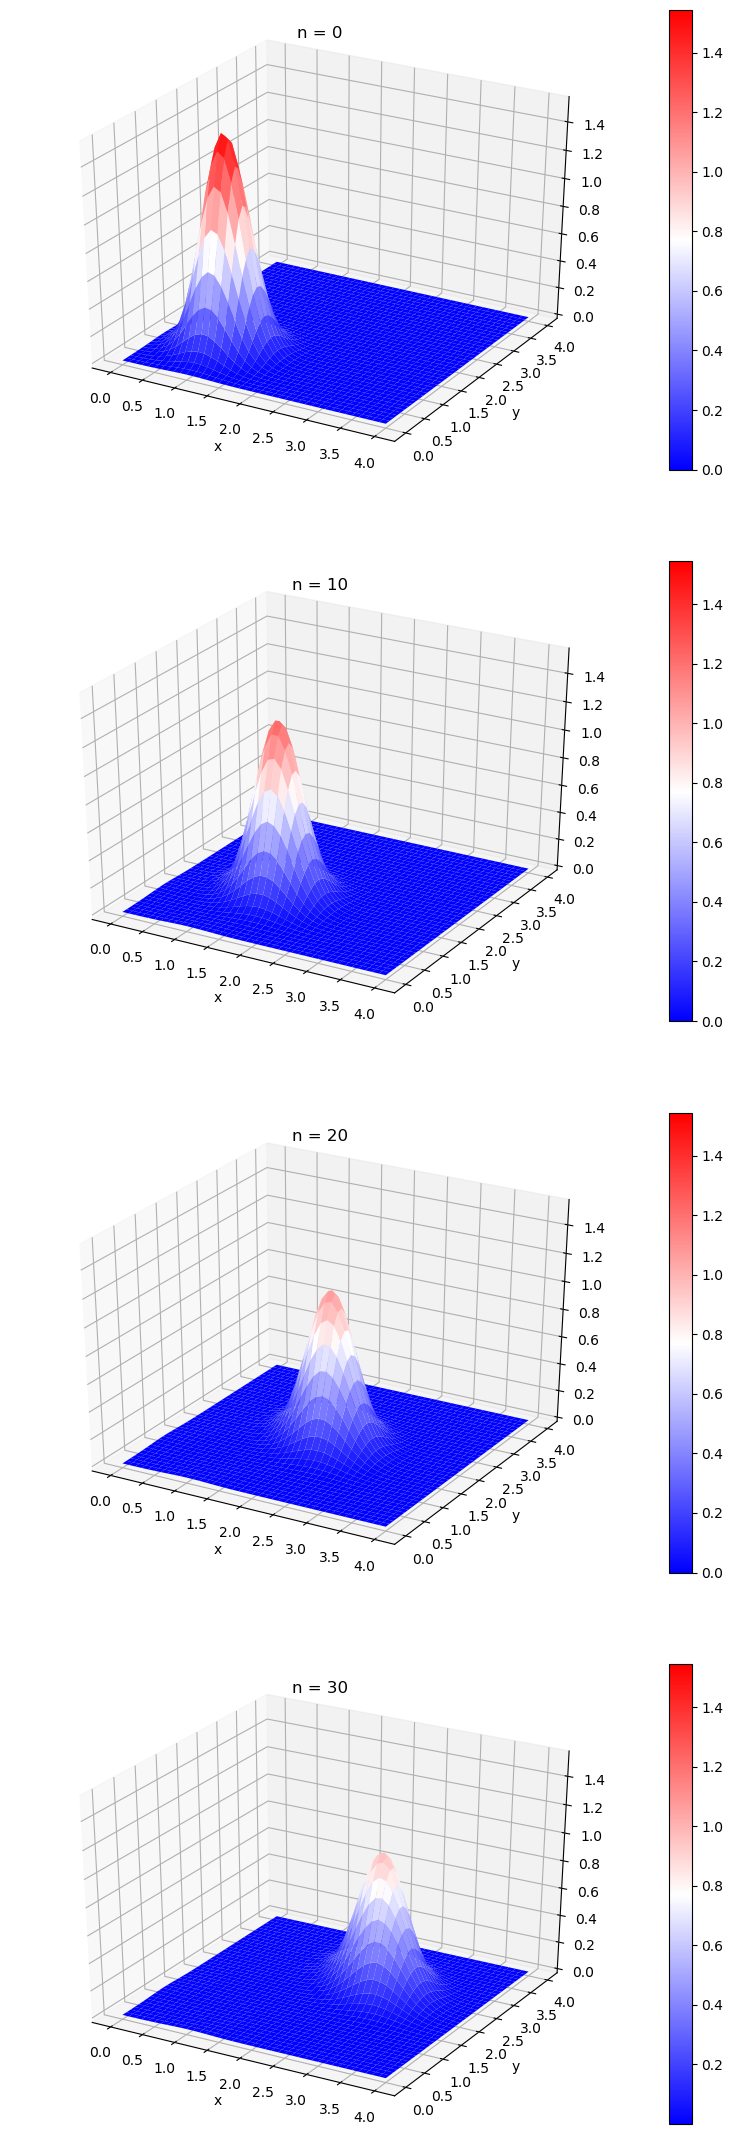

In [8]:
x, y, q = init(dx, dy, jmax, kmax)
do_computing(x, y, q, dt, dx, dy, nmax, interval = 10)